# Loan classification

**G Henry Jacob**

10th Jun 2021

### Introduction

loan classsification data set contains details of applicants and the target variable is Loan status whether the applicant's loan approved or not 

##### Data can be found at <code>[here](https://www.kaggle.com/burak3ergun/loan-data-set)<code>

![](https://www.iifl.com/sites/default/files/personal_loan_background_0.jpg)

### Business Problem

The aim is to help the bank to know whom they can lend loan. Our findings will help bank to understand about their customers detail and whether the customer would repay to the last penny.

### Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Collecting Data

In [2]:
# read data
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data Analysing

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
gender = df['Gender'].value_counts()

<Figure size 576x576 with 0 Axes>

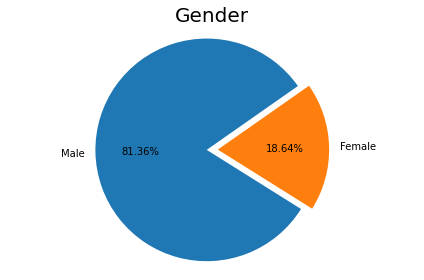

In [7]:
# to plot pie chart
plt.figure(figsize = (8, 8))
labels = ['Male', 'Female']
size = [gender[0], gender[1]]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels, explode = explode, autopct = '%.2f%%', startangle= 35)
ax1.axis('equal')
ax1.set_title('Gender', size = 20)
plt.tight_layout()
plt.show()

In [8]:
status = df['Married'].value_counts()

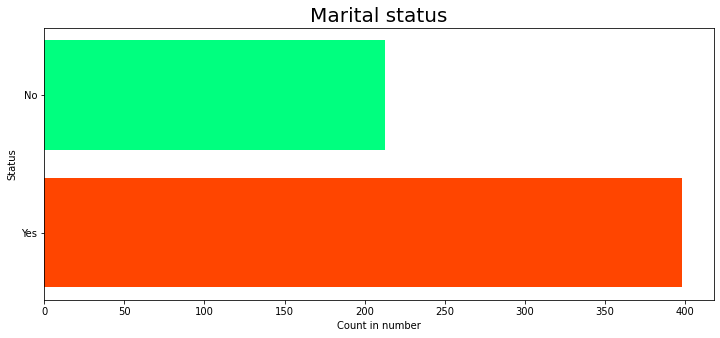

In [9]:
# to plot barplot
color = ['orangered', 'springgreen']
plt.figure(figsize = (12, 5))
plt.barh(y = [status.index[0], status.index[1]], width=[status[0], status[1]], color = color)
plt.ylabel('Status')
plt.xlabel('Count in number')
plt.title('Marital status', size = 20)
plt.show()

In [10]:
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

In [11]:
male_dep = male['Dependents'].value_counts()
male_dep

0     258
2      92
1      82
3+     45
Name: Dependents, dtype: int64

In [12]:
female_dep = female['Dependents'].value_counts()
female_dep

0     80
1     19
2      7
3+     3
Name: Dependents, dtype: int64

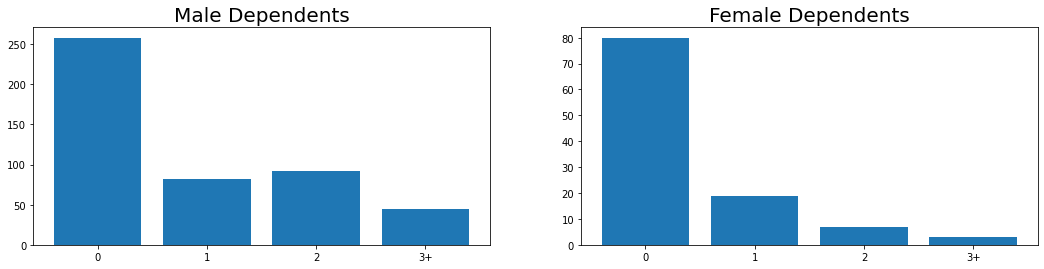

In [13]:
# to plot male dependents
plt.figure(figsize=(18,4));
plt.subplot(121)
plt.bar(x = ['0', '1', '2', '3+'], height = [male_dep[0], male_dep[2], male_dep[1], male_dep[3]])
plt.title('Male Dependents', size = 20);

# to plot female dependents
ax2 = plt.subplot(122)
plt.bar(x = ['0', '1', '2', '3+'], height = [female_dep[0], female_dep[1], female_dep[2], female_dep[3]])
plt.title('Female Dependents', size = 20);

In [14]:
male_grad = male['Education'].value_counts()
male_grad

Graduate        376
Not Graduate    113
Name: Education, dtype: int64

In [15]:
female_grad = female['Education'].value_counts()
female_grad

Graduate        92
Not Graduate    20
Name: Education, dtype: int64

In [16]:
print(f'Percentage of Male graduate : {np.round(male_grad[0]/(male_grad[0] + male_grad[1]) * 100, 2)}')
print(f'Percentage of Female graduate : {np.round(female_grad[0]/(female_grad[0] + female_grad[1]) * 100, 2)}')

Percentage of Male graduate : 76.89
Percentage of Female graduate : 82.14


In [17]:
male['Married'].value_counts()

Yes    357
No     130
Name: Married, dtype: int64

In [18]:
female['Married'].value_counts()

No     80
Yes    31
Name: Married, dtype: int64

In [19]:
self_emp = df['Self_Employed'].value_counts()
self_emp

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
print(f'Total percentage of Self employed : {self_emp[1]/(self_emp[0]+ self_emp[1]) * 100}')

Total percentage of Self employed : 14.0893470790378


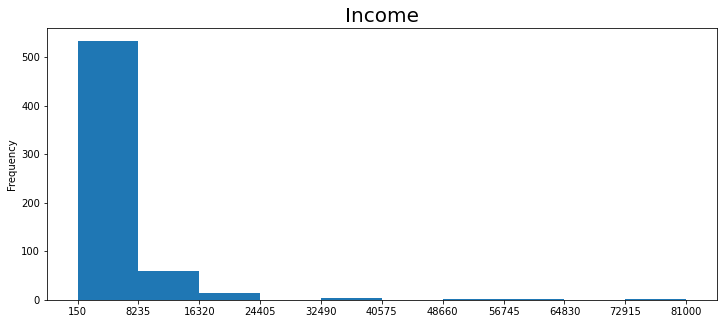

In [21]:
# to plot histogram
plt.figure(figsize = (12, 5))
count, bin_edges = np.histogram(df['ApplicantIncome'])
df['ApplicantIncome'].plot(kind = 'hist', xticks = bin_edges)
plt.title('Income', size = 20)
plt.show()

There are few applicants who have income more than 30000

In [22]:
df[df['ApplicantIncome'] > 30000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


If we seperate Applicant's income below 25k

In [23]:
def five_k(col):
    if col <= 5000:
        return 'Below 5k'
    elif col > 5000 and col <= 10000:
        return '5k to 10k'
    elif col > 10000 and col <= 15000:
        return '10k to 15k'
    elif col > 15000 and col <= 20000:
        return '15k to 20k'
    elif col > 20000 and col <= 25000:
        return '20k to 25k'
    else:
        return 'Above 25k'

In [24]:
df['IncomeRange'] = df['ApplicantIncome'].apply(five_k)

In [25]:
inc_range = df['IncomeRange'].value_counts()

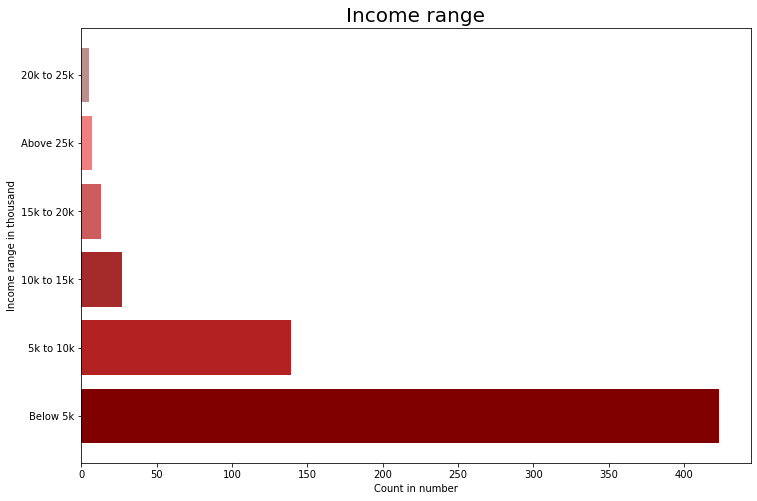

In [26]:
# to plot barplot
color = ['maroon', 'firebrick', 'brown', 'indianred', 'lightcoral', 'rosybrown']
plt.figure(figsize = (12, 8))
plt.barh(y = inc_range.index, width = inc_range.values, color = color)
plt.title('Income range', size = 20)
plt.ylabel('Income range in thousand')
plt.xlabel('Count in number')
plt.show()

There are more than 400 applicants who have income below 5000

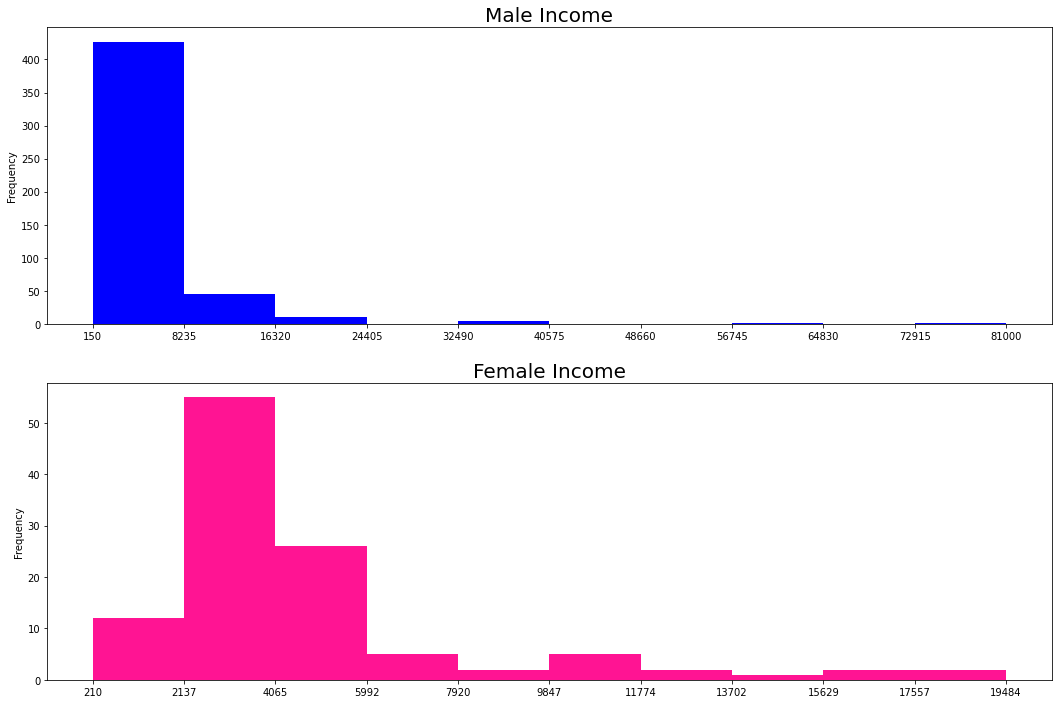

In [27]:
# to plot male income
color = ['blue']
plt.figure(figsize=(18,12));
plt.subplot(211)
count, bin_edges = np.histogram(male['ApplicantIncome'])
male['ApplicantIncome'].plot(kind = 'hist', xticks = bin_edges, color = color)
plt.title('Male Income', size = 20);

# to plot female income
color = ['deeppink']
ax2 = plt.subplot(212)
count, bin_edges = np.histogram(female['ApplicantIncome'])
female['ApplicantIncome'].plot(kind = 'hist', xticks = bin_edges, color = color)
plt.title('Female Income', size = 20);

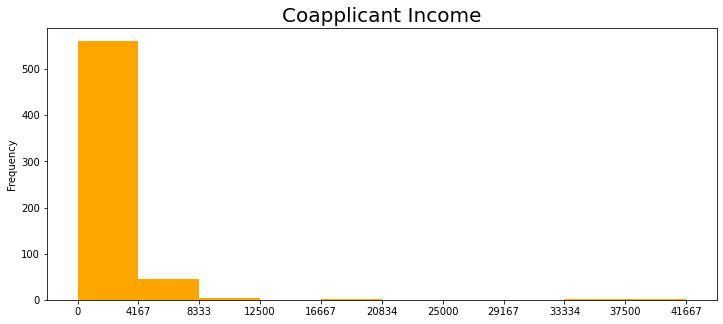

In [28]:
# to plot histogram
count, bin_edges = np.histogram(df['CoapplicantIncome'])
plt.figure(figsize = (12, 5))
df['CoapplicantIncome'].plot(kind = 'hist', xticks = bin_edges, color = 'orange')
plt.title('Coapplicant Income', size = 20)
plt.show()

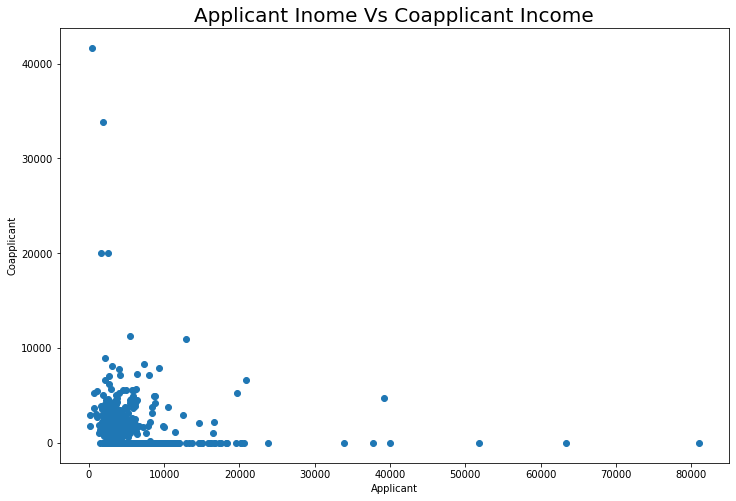

In [29]:
# to plot scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(df['ApplicantIncome'], df['CoapplicantIncome'])
plt.xlabel('Applicant')
plt.ylabel('Coapplicant')
plt.title('Applicant Inome Vs Coapplicant Income', size = 20)
plt.show()

In [30]:
# coapplicant with 0 income
coap_nil = df[df['CoapplicantIncome'] == 0].shape[0]
coap_nil

273

In [31]:
df[df['ApplicantIncome'] == df['ApplicantIncome'].min()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeRange
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,Below 5k


There are Applicants who have 0 income

In [32]:
print(f'Out of {df.shape[0]} Coapplicants {coap_nil} Coapplicants are with 0 Income')

Out of 614 Coapplicants 273 Coapplicants are with 0 Income


In [33]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeRange
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5k to 10k
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Below 5k


In [34]:
df['LoanAmount'].fillna(0, inplace= True)

In [35]:
loan_amount_greater_0 = df[df['LoanAmount'] > 0]

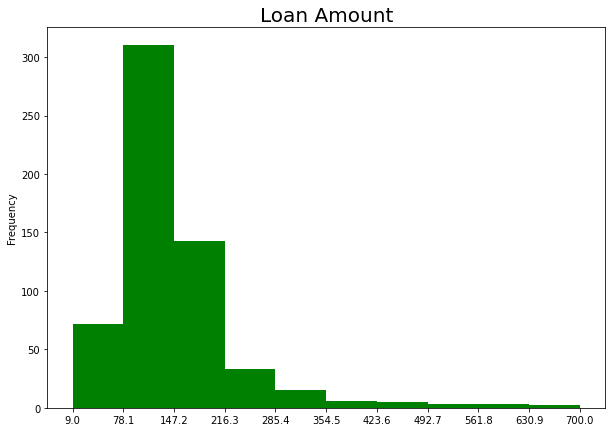

In [36]:
# to plot histogram
plt.figure(figsize = (10, 7))
count, bin_edges = np.histogram(loan_amount_greater_0['LoanAmount'])
loan_amount_greater_0['LoanAmount'].plot(kind = 'hist', xticks = bin_edges, color = 'green')
plt.title('Loan Amount', size = 20)
plt.show()

In [37]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [38]:
area = df['Property_Area'].value_counts()
area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

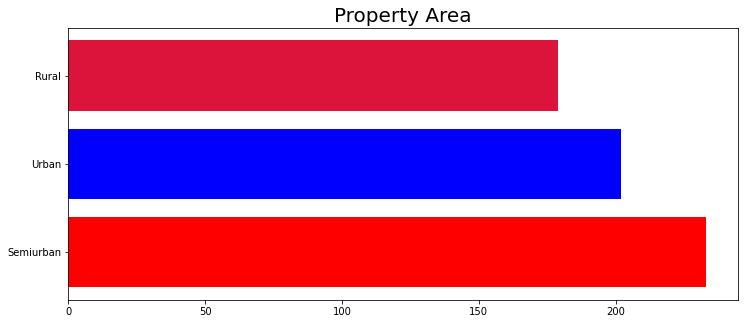

In [39]:
# to plot horizontal bar plot
color = ['red', 'blue', 'crimson']
plt.figure(figsize = (12, 5))
plt.barh(y = area.index, width = area.values, color = color)
plt.title('Property Area', size = 20)
plt.show()

In [40]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.538290,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.059878,-0.002056
LoanAmount,0.538290,0.190377,1.000000,0.040539,-0.002197
Loan_Amount_Term,-0.045306,-0.059878,0.040539,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.002197,0.001470,1.000000


### Hypothesis Testing

#### Independent t-test

In [41]:
from scipy.stats import ttest_ind

In [42]:
app_inc = df['ApplicantIncome'].sample(25)
coapp_inc = df['CoapplicantIncome'].sample(25)

In [43]:
ind_test = ttest_ind(app_inc, coapp_inc)
if ind_test.pvalue > 0.05:
    print('Fail to reject Null Hypothesis(H0)')
    print('No difference between mean')
else:
    print('Reject Null Hypothesis, Difference between sample mean')

Reject Null Hypothesis, Difference between sample mean


#### Anova test

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
mod = ols('ApplicantIncome ~ Gender + Married', data = df).fit()

In [46]:
av = sm.stats.anova_lm(mod, type = 2)

In [47]:
av

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,6.630304e+07,6.630304e+07,1.966952,0.161293
Married,1.0,1.055657e+07,1.055657e+07,0.313172,0.575951
Residual,595.0,2.005657e+10,3.370851e+07,NaN,NaN


#### Chi2 test

In [48]:
from scipy.stats import chi2_contingency

In [49]:
contingency_data = pd.crosstab(df['Gender'], df['Married'])
contingency_data

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


In [50]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print(f'stats :{np.round(stat, 3)}')
print(f'p value is :{np.round(p, 3)}')
if p > 0.05:
    print('Independent categories')
else:
    print('Dependent categories')

stats :79.715
p value is :0.0
Dependent categories


In [51]:
contingency_data = pd.crosstab(df['Married'], df['Property_Area'])
contingency_data

Property_Area,Rural,Semiurban,Urban
Married,,,
No,63,80,70
Yes,116,151,131


In [52]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print(f'stats :{np.round(stat, 3)}')
print(f'p value is :{np.round(p, 3)}')
if p > 0.05:
    print('Independent categories')
else:
    print('Dependent categories')

stats :0.014
p value is :0.993
Independent categories


#### Tukey test

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [54]:
def tukey_test(cont, categ):
    tukey = pairwise_tukeyhsd(endog= cont,
                             groups= categ)
    tukey.plot_simultaneous()
    plt.vlines(x = np.mean(cont), ymin=-0.5, ymax=len(categ.unique()) - .5, color = 'red')
    print(tukey.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
    Rural Semiurban  -6.7557 0.6963  -27.045 13.5336  False
    Rural     Urban -10.0612 0.5035 -31.1813  11.059  False
Semiurban     Urban  -3.3054    0.9 -23.0437 16.4328  False
-----------------------------------------------------------


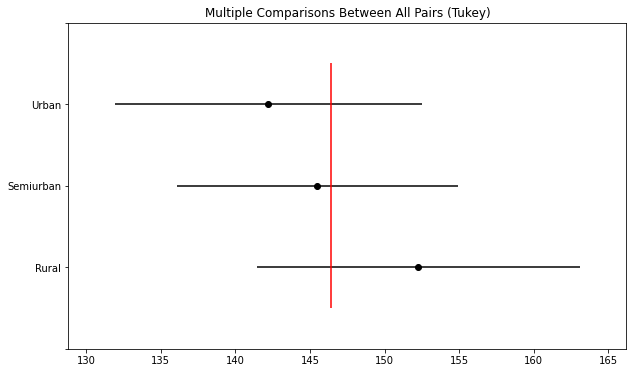

In [55]:
tukey_test(loan_amount_greater_0['LoanAmount'], loan_amount_greater_0['Property_Area'])

Loan amounts are vary based on property area

### Data wrangling

In [56]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
IncomeRange           0
dtype: int64

<AxesSubplot:>

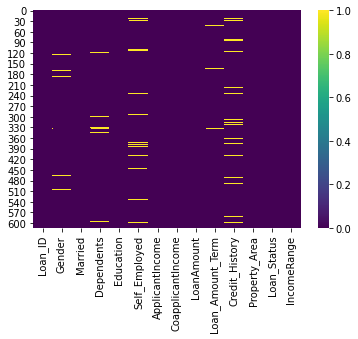

In [57]:
# to see null values in heatmap
sns.heatmap(df.isnull(), cmap= 'viridis')

In [58]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

To fill nan values, first we replace nan with 0 then fill it with related values which highly depend on other feature

In [59]:
df['Self_Employed'].fillna(0, inplace = True)

In [60]:
col = ['Gender', 'Married', 'Dependents', 'Education',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [61]:
self_emp = df[df['Self_Employed'] == 'Yes']

In [62]:
for x in col:
    print(x)
    print(self_emp[x].value_counts())
    print()

Gender
Male      63
Female    15
Name: Gender, dtype: int64

Married
Yes    54
No     28
Name: Married, dtype: int64

Dependents
0     37
1     20
2     16
3+     7
Name: Dependents, dtype: int64

Education
Graduate        65
Not Graduate    17
Name: Education, dtype: int64

Loan_Amount_Term
360.0    67
180.0     5
300.0     3
240.0     1
84.0      1
120.0     1
480.0     1
60.0      1
Name: Loan_Amount_Term, dtype: int64

Credit_History
1.0    63
0.0    12
Name: Credit_History, dtype: int64

Property_Area
Semiurban    32
Rural        26
Urban        24
Name: Property_Area, dtype: int64

Loan_Status
Y    56
N    26
Name: Loan_Status, dtype: int64



Loan amount term has more values of 360 for Yes in self employed, so we replace 'Yes' with self employed for loan amount term 360 and 'No' for rest of 0 values 

In [63]:
def self_emp_replace(col):
    self_emp = col[0]
    lat = col[1]
    if self_emp == 0:
        if lat == 360:
            return 'Yes'
        else:
            return 'No'
    else:
        return self_emp

In [64]:
df['Self_Employed'] = df[['Self_Employed', 'Loan_Amount_Term']].apply(self_emp_replace, axis = 1)

In [65]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [66]:
# replace nan loan amount term with mode
df['Loan_Amount_Term'].fillna(360, inplace = True)

In [67]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [68]:
cr_hist_yes = df[df['Credit_History'] == 1]
cr_hist_no = df[df['Credit_History'] == 0]

In [69]:
col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status']

to see which category in which feature credit history depend on

In [70]:
for x in col:
    print(x)
    print(cr_hist_yes[x].value_counts())
    print()

Gender
Male      382
Female     84
Name: Gender, dtype: int64

Married
Yes    305
No     167
Name: Married, dtype: int64

Dependents
0     271
2      81
1      76
3+     37
Name: Dependents, dtype: int64

Education
Graduate        380
Not Graduate     95
Name: Education, dtype: int64

Self_Employed
No     391
Yes     84
Name: Self_Employed, dtype: int64

Loan_Amount_Term
360.0    412
180.0     33
480.0     10
300.0      7
84.0       3
240.0      3
120.0      3
36.0       2
60.0       2
Name: Loan_Amount_Term, dtype: int64

Property_Area
Semiurban    187
Urban        151
Rural        137
Name: Property_Area, dtype: int64

Loan_Status
Y    378
N     97
Name: Loan_Status, dtype: int64



Theres no huge differences in featured for credit history

In [71]:
for x in col:
    print(x)
    print(cr_hist_no[x].value_counts())
    print()

Gender
Male      69
Female    17
Name: Gender, dtype: int64

Married
Yes    57
No     32
Name: Married, dtype: int64

Dependents
0     45
1     14
2     14
3+    11
Name: Dependents, dtype: int64

Education
Graduate        63
Not Graduate    26
Name: Education, dtype: int64

Self_Employed
No     76
Yes    13
Name: Self_Employed, dtype: int64

Loan_Amount_Term
360.0    72
180.0    10
480.0     4
300.0     3
Name: Loan_Amount_Term, dtype: int64

Property_Area
Urban        31
Semiurban    30
Rural        28
Name: Property_Area, dtype: int64

Loan_Status
N    82
Y     7
Name: Loan_Status, dtype: int64



Credit history with 0 has Loan status No for most of the applicants

In [72]:
# replace 1000 with nan then replace with related values
df['Credit_History'].fillna(1000, inplace = True)

In [73]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [74]:
def cr_hist_replace(col):
    cr_his = col[0]
    loan_st = col[1]
    if cr_his == 1000:
        if loan_st == 'N':
            return 0
        else:
            return 1
    else:
        return cr_his

In [75]:
df['Credit_History'] = df[['Credit_History', 'Loan_Status']].apply(cr_hist_replace, axis = 1)

As we saw in tukey test Loan amount vary based on Property area, we will fill 0 loan amount with mean loan amount based on property area

In [76]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [77]:
urban = df[df['Property_Area'] == 'Urban']
rural = df[df['Property_Area'] == 'Rural']
semiurban = df[df['Property_Area'] == 'Semiurban']

In [78]:
urban[urban['LoanAmount'] > 0]['LoanAmount'].mean()

142.19895287958116

In [79]:
rural[rural['LoanAmount'] > 0]['LoanAmount'].mean()

152.2601156069364

In [80]:
semiurban[semiurban['LoanAmount'] > 0]['LoanAmount'].mean()

145.50438596491227

In [81]:
def loan_amt_replace(col):
    prop_area = col[0]
    loan_amt = col[1]
    if loan_amt == 0:
        if prop_area == 'Urban':
            return 142
        elif prop_area == 'Rural':
            return 152
        else:
            return 145
    else:
        return loan_amt

In [82]:
df['LoanAmount'] = df[['Property_Area', 'LoanAmount']].apply(loan_amt_replace, axis = 1)

### One hot encoding

In [83]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
IncomeRange           object
dtype: object

In [84]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

In [85]:
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})

In [86]:
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})

In [87]:
df['Self_Employed'] = df['Self_Employed'].replace({'No':0, 'Yes':1})

In [88]:
df['Property_Area'] = df['Property_Area'].replace({'Urban':0, 'Rural':1, 'Semiurban':2})

In [89]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [90]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [91]:
def dep_replace(col):
    if col == '0':
        return 0
    elif col == '1':
        return 1
    elif col == '2':
        return 2
    else:
        return 3

In [92]:
df['Dependents'] = df['Dependents'].apply(dep_replace)

In [93]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
IncomeRange           object
dtype: object

In [94]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeRange
0,LP001002,1.0,0.0,0,1,0,5849,0.0,142.0,360.0,1.0,0,1,5k to 10k
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,Below 5k


#### Remove unwanted columns

In [95]:
df.drop(['Loan_ID', 'IncomeRange'], axis = 1, inplace = True)

#### Remove null values

In [96]:
df.dropna(axis = 0, inplace = True)

In [97]:
df.dtypes

Gender               float64
Married              float64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

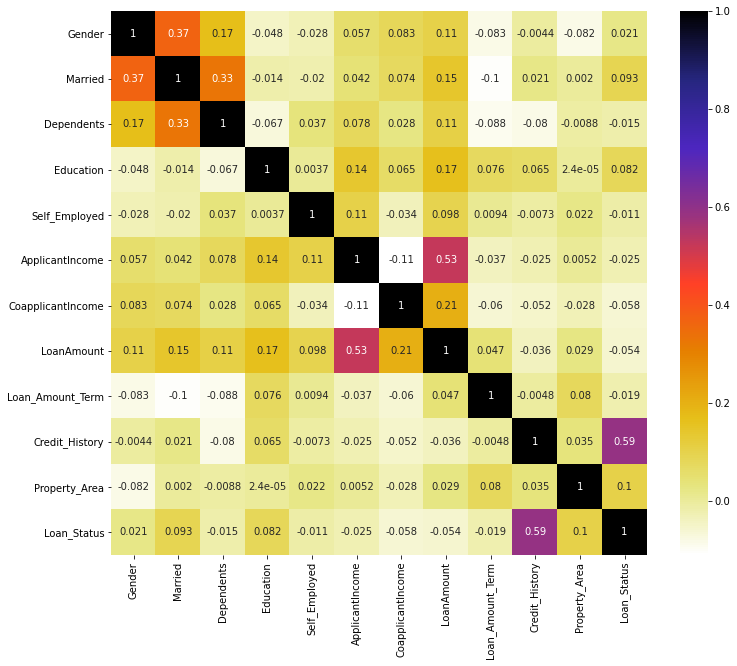

In [98]:
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot= True, cmap= plt.cm.CMRmap_r)
plt.show()

There is no high correlation between two features

### Train

In [99]:
X = df.drop(['Loan_Status'], axis = 1).copy()
y = df['Loan_Status'].copy()

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, test_size= 0.3)

In [102]:
sup_vec = SVC().fit(X_train, y_train)

### Test

In [103]:
pred = sup_vec.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

### Accuracy 

In [105]:
accuracy_score(y_test, pred)

0.7111111111111111

### Results

Female applied 18.64% loan among all

Almost 400 applicants are married and above 200 applicants are not married

Male applicants have more dependents than Female 

Percentage of Female graduate is higher than percentage of Male graduate

Only 14% of applicants are self employed

Applicants income range from 150 to 81000 whereas Male has the range of 150 to 81000 and Female has 210 to 19484

More number of applicants have income below 5000

Co-applicants income range from 0 to 41667

There are 237 co-applicants have income of 0

Applicants loan amount from 9 to 700 and it is based on property area.